# Pre-processing (state / organization Name) Regulatory data for WaDE upload.
- Purpose:  To preprocess the data into one master file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/NorthDakota/Regulatory" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/NorthDakota/Regulatory


## Regulatory Area Data #1

In [3]:
# Input File
inputFile = "RawInputData/shapefile/Water_Resource_Districts_ND.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "re" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/Water_Resource_Districts_ND.zip', compression=dict(method='zip', archive_name='Water_Resource_Districts_ND.csv'), index=False)

# Realign Geometry Projection
dfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326)

print(len(dfin1))
dfin1.head()

64


,gid,wadeID,objectid,name,state_name,ndaco_id,name_caps,RegEngArea,Drain_Gen,Sm_Proj,Status,Shape_Leng,Shape_Area,geometry,WaDEUUID
0,6,6,6,Renville,North Dakota,38,RENVILLE,1,1173,1300,0,3.00324,0.28259,"POLYGON ((-102.02126 48.99884, -102.00047 48.9...",re0
1,7,7,7,Rolette,North Dakota,40,ROLETTE,1,1218,1302,0,2.28898,0.29769,"POLYGON ((-100.18262 48.99927, -100.16189 48.9...",re1
2,8,8,8,Burke,North Dakota,7,BURKE,1,2025,1269,0,2.74105,0.35780,"POLYGON ((-102.93897 48.99929, -102.91797 48.9...",re2
3,9,9,9,Ward,North Dakota,51,WARD,1,1262,1313,0,4.44514,0.64454,"POLYGON ((-102.02166 48.80709, -102.02155 48.7...",re3
4,10,10,10,Williams,North Dakota,53,WILLIAMS,1,1735,1315,0,4.19623,0.67493,"POLYGON ((-102.88567 48.63320, -102.88584 48.6...",re4


In [4]:
for x in dfin1['gid'].astype(str).sort_values():
    print(f'"' + x + '",')

"0",
"0",
"0",
"0",
"0",
"0",
"0",
"0",
"0",
"0",
"0",
"1",
"10",
"11",
"12",
"13",
"14",
"15",
"16",
"17",
"18",
"19",
"2",
"20",
"21",
"22",
"23",
"24",
"25",
"26",
"27",
"28",
"29",
"3",
"30",
"31",
"32",
"33",
"34",
"35",
"36",
"37",
"38",
"39",
"4",
"40",
"41",
"42",
"43",
"44",
"45",
"46",
"47",
"48",
"49",
"50",
"51",
"52",
"53",
"55",
"6",
"7",
"8",
"9",


In [5]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "8/2/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "NDre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1["name"]
df['in_ReportingUnitNativeID'] = "nd" + dfin1["wadeID"].astype(str) # temp fix for *gid* input
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Water Resource District"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "ND"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = "North Dakota Department of Water Resources"
df['in_RegulatoryDescription'] = "responsible for water management in North Dakota at the local county, or sub-county level. WRDs are typically comprised of three or more board members - addressing water management issues such as drainage, water control, watershed planning, and assessment projects. Water Resource Districts (WRDs) are also allowed to form joint districts by joining together to manage water and water projects across district boundaries."
df['in_RegulatoryName'] = dfin1["name"]
df['in_RegulatoryOverlayNativeID'] = dfin1["wadeID"] # temp fix for *gid* input
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = "https://www.ndlegis.gov/cencode/t61c16-1.pdf"
df['in_StatutoryEffectiveDate'] = "1/1/1935"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Water Resource District"
df['in_WaterSourceTypeCV'] = "Surface and Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

64


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,re0,8/2/2023,2023,NDre_O1,4326,Renville,nd6,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Renville,6,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1/1/1935,,Water Resource District,Surface and Groundwater
1,re1,8/2/2023,2023,NDre_O1,4326,Rolette,nd7,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Rolette,7,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1/1/1935,,Water Resource District,Surface and Groundwater
2,re2,8/2/2023,2023,NDre_O1,4326,Burke,nd8,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Burke,8,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1/1/1935,,Water Resource District,Surface and Groundwater
3,re3,8/2/2023,2023,NDre_O1,4326,Ward,nd9,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Ward,9,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1/1/1935,,Water Resource District,Surface and Groundwater
4,re4,8/2/2023,2023,NDre_O1,4326,Williams,nd10,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Williams,10,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1/1/1935,,Water Resource District,Surface and Groundwater


## Regulatory Area #2

In [6]:
# etc etc,

## Concatenate POD and POU Data.  Make needed changes

In [7]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

64


## Clean Data / data types

In [8]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [9]:
outdf['in_ReportingUnitName'] = df.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['Renville', 'Rolette', 'Burke', 'Ward', 'Williams', 'McHenry',
       'Mountrail', 'Pierce', 'Ramsey', 'Walsh', 'Benson', 'Nelson',
       'Grand Forks', 'McKenzie', 'McLean', 'Sheridan', 'Wells', 'Eddy',
       'Dunn', 'Griggs', 'McIntosh', 'Steele', 'Traill', 'Foster',
       'Mercer', 'Golden Valley', 'Billings', 'Burleigh', 'Kidder',
       'Stutsman', 'Oliver', 'Barnes', 'Cass', 'Stark', 'Pembina',
       'Cavalier', 'Slope', 'Logan', 'Richland', 'LaMoure', 'Hettinger',
       'Ransom', 'Sioux', 'Adams', 'Dickey', 'Sargent', 'Bowman',
       'Divide', 'Towner', 'Morton', 'Grant', 'Emmons', 'North Cass',
       'Rush River WRD', 'Maple River WRD', 'Southeast Cass WRD',
       'North Cass WRD', 'Boundary Creek WRD', 'Bottineau County WRD',
       'Oak Creek WRD', 'Marmarth', 'Willow Creek', 'Lower Heart WMD'],
      dtype=object)

In [10]:
outdf['in_RegulatoryDescription'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['responsible for water management in North Dakota at the local county, or sub-county level. WRDs are typically comprised of three or more board members - addressing water management issues such as drainage, water control, watershed planning, and assessment projects. Water Resource Districts (WRDs) are also allowed to form joint districts by joining together to manage water and water projects across district boundaries.'],
      dtype=object)

In [11]:
outdf['in_RegulatoryName'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['Renville', 'Rolette', 'Burke', 'Ward', 'Williams', 'McHenry',
       'Mountrail', 'Pierce', 'Ramsey', 'Walsh', 'Benson', 'Nelson',
       'Grand Forks', 'McKenzie', 'McLean', 'Sheridan', 'Wells', 'Eddy',
       'Dunn', 'Griggs', 'McIntosh', 'Steele', 'Traill', 'Foster',
       'Mercer', 'Golden Valley', 'Billings', 'Burleigh', 'Kidder',
       'Stutsman', 'Oliver', 'Barnes', 'Cass', 'Stark', 'Pembina',
       'Cavalier', 'Slope', 'Logan', 'Richland', 'LaMoure', 'Hettinger',
       'Ransom', 'Sioux', 'Adams', 'Dickey', 'Sargent', 'Bowman',
       'Divide', 'Towner', 'Morton', 'Grant', 'Emmons', 'North Cass',
       'Rush River WRD', 'Maple River WRD', 'Southeast Cass WRD',
       'North Cass WRD', 'Boundary Creek WRD', 'Bottineau County WRD',
       'Oak Creek WRD', 'Marmarth', 'Willow Creek', 'Lower Heart WMD'],
      dtype=object)

In [12]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

array(['1935-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

# Shapefile Data
- For attaching geometry to reporting unit info.

#### Regulatory Area #1 shapefile info

In [13]:
# Input File
# shapeInputFile = "RawInputData/Water_Resource_Districts_ND/Water_Resource_Districts_ND.shp"
# gdfin1 = gpd.read_file(shapeInputFile)

# # Realign Geometry Projection
# gdfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326)

gdfin1 = dfin1

print(len(gdfin1))
gdfin1.head()

64


,gid,wadeID,objectid,name,state_name,ndaco_id,name_caps,RegEngArea,Drain_Gen,Sm_Proj,Status,Shape_Leng,Shape_Area,geometry,WaDEUUID
0,6,6,6,Renville,North Dakota,38,RENVILLE,1,1173,1300,0,3.00324,0.28259,"POLYGON ((-102.02126 48.99884, -102.00047 48.9...",re0
1,7,7,7,Rolette,North Dakota,40,ROLETTE,1,1218,1302,0,2.28898,0.29769,"POLYGON ((-100.18262 48.99927, -100.16189 48.9...",re1
2,8,8,8,Burke,North Dakota,7,BURKE,1,2025,1269,0,2.74105,0.35780,"POLYGON ((-102.93897 48.99929, -102.91797 48.9...",re2
3,9,9,9,Ward,North Dakota,51,WARD,1,1262,1313,0,4.44514,0.64454,"POLYGON ((-102.02166 48.80709, -102.02155 48.7...",re3
4,10,10,10,Williams,North Dakota,53,WILLIAMS,1,1735,1315,0,4.19623,0.67493,"POLYGON ((-102.88567 48.63320, -102.88584 48.6...",re4


<AxesSubplot: >

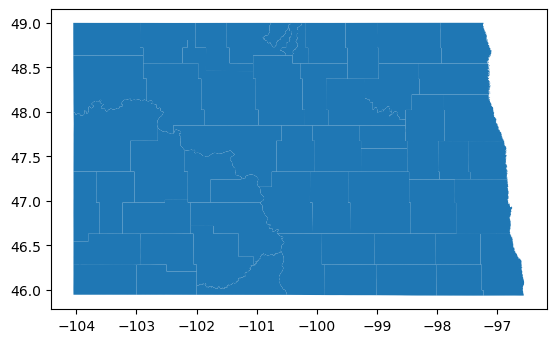

In [14]:
# plot shape info to map
gdfin1.plot()

In [15]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] = "nd" + dfin1["wadeID"].astype(str) # temp fix for *gid* input # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf1['geometry'] = gdfin1['geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)
print(len(goutdf1))
goutdf1.head()

64


,in_ReportingUnitNativeID,geometry
0,nd6,"POLYGON ((-102.02126 48.99884, -102.00047 48.9..."
1,nd7,"POLYGON ((-100.18262 48.99927, -100.16189 48.9..."
2,nd8,"POLYGON ((-102.93897 48.99929, -102.91797 48.9..."
3,nd9,"POLYGON ((-102.02166 48.80709, -102.02155 48.7..."
4,nd10,"POLYGON ((-102.88567 48.63320, -102.88584 48.6..."


#### Regulatory Area #2 shapefile info

In [16]:
# etc etc...

#### Concatenate goutdf shapefile info into single output

In [17]:
# Concatenate Basin & Subbasin DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

64


,in_ReportingUnitNativeID,geometry
0,nd6,"POLYGON ((-102.02126 48.99884, -102.00047 48.9..."
1,nd7,"POLYGON ((-100.18262 48.99927, -100.16189 48.9..."
2,nd8,"POLYGON ((-102.93897 48.99929, -102.91797 48.9..."
3,nd9,"POLYGON ((-102.02166 48.80709, -102.02155 48.7..."
4,nd10,"POLYGON ((-102.88567 48.63320, -102.88584 48.6..."


## Export Data

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                               object
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID              object
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(goutdf.dtypes)

in_ReportingUnitNativeID      object
geometry                    geometry
dtype: object


In [20]:
outdf

,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,re0,8/2/2023,2023,NDre_O1,4326,Renville,nd6,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Renville,6,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1935-01-01,,Water Resource District,Surface and Groundwater
1,re1,8/2/2023,2023,NDre_O1,4326,Rolette,nd7,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Rolette,7,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1935-01-01,,Water Resource District,Surface and Groundwater
2,re2,8/2/2023,2023,NDre_O1,4326,Burke,nd8,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Burke,8,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1935-01-01,,Water Resource District,Surface and Groundwater
3,re3,8/2/2023,2023,NDre_O1,4326,Ward,nd9,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Ward,9,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1935-01-01,,Water Resource District,Surface and Groundwater
4,re4,8/2/2023,2023,NDre_O1,4326,Williams,nd10,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Williams,10,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1935-01-01,,Water Resource District,Surface and Groundwater
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,re59,8/2/2023,2023,NDre_O1,4326,Oak Creek WRD,nd0-4,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Oak Creek WRD,0-4,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1935-01-01,,Water Resource District,Surface and Groundwater
60,re60,8/2/2023,2023,NDre_O1,4326,Bottineau County WRD,nd0-2,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Bottineau County WRD,0-2,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1935-01-01,,Water Resource District,Surface and Groundwater
61,re61,8/2/2023,2023,NDre_O1,4326,Marmarth,nd56,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Marmarth,56,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1935-01-01,,Water Resource District,Surface and Groundwater
62,re62,8/2/2023,2023,NDre_O1,4326,Willow Creek,nd57,,Water Resource District,,ND,,North Dakota Department of Water Resources,responsible for water management in North Dako...,Willow Creek,57,Active,,https://www.ndlegis.gov/cencode/t61c16-1.pdf,1935-01-01,,Water Resource District,Surface and Groundwater


In [21]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pre_ndMain.zip', compression=dict(method='zip', archive_name='Pre_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.